# Malignant Comments Classification

### Problem Statement

#### The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
#### Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

#### There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
#### Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

## Our Goal:

#### Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Installing word cloud:-
###### A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [ ]:
!pip install wordcloud

## Fetching Important Libraries:

In [1]:
# Importing Numpy and Pandas for dataframe:
import numpy as np
import pandas as pd

# Importing Visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing NLP libraries:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#Word Cloud is a data visualization technique used for representing text data:
from wordcloud import WordCloud, STOPWORDS

import xgboost
#import eli5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Importing model:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

import joblib

In [2]:
train_df = pd.read_csv(r'C:/csv_files/Malignant_Comments_Classifier_Project/train.csv',error_bad_lines=False)
pd.set_option("display.max_columns", None)
train_df

b'Skipping line 14106: expected 8 fields, saw 9\nSkipping line 39685: expected 8 fields, saw 14\nSkipping line 44664: expected 8 fields, saw 10\nSkipping line 53147: expected 8 fields, saw 9\n'
b'Skipping line 119759: expected 8 fields, saw 14\nSkipping line 124900: expected 8 fields, saw 10\nSkipping line 128488: expected 8 fields, saw 13\n'
b'Skipping line 131752: expected 8 fields, saw 11\n'


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159574,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0.0,0.0,0.0,0.0,0.0
159575,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0.0,0.0,0.0,0.0,0.0
159576,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0.0,0.0,0.0,0.0,0.0
159577,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0.0,0.0,0.0,0.0,0.0


In [3]:
test_df = pd.read_csv('C:/csv_files/Malignant_Comments_Classifier_Project/test.csv')
pd.set_option("display.max_columns", None)
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159579 entries, 0 to 159578
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159579 non-null  object 
 1   comment_text      159572 non-null  object 
 2   malignant         159566 non-null  object 
 3   highly_malignant  159564 non-null  float64
 4   rude              159564 non-null  float64
 5   threat            159564 non-null  float64
 6   abuse             159564 non-null  float64
 7   loathe            159561 non-null  float64
dtypes: float64(5), object(3)
memory usage: 9.7+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


### Finding null values:

In [6]:
train_df.isnull().sum()

id                   0
comment_text         7
malignant           13
highly_malignant    15
rude                15
threat              15
abuse               15
loathe              18
dtype: int64

In [7]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

### Find Correlations  and visualization:

                  highly_malignant      rude    threat     abuse    loathe
highly_malignant          1.000000  0.403014  0.123601  0.375807  0.201600
rude                      0.403014  1.000000  0.141179  0.741272  0.286866
threat                    0.123601  0.141179  1.000000  0.150022  0.115128
abuse                     0.375807  0.741272  0.150022  1.000000  0.337736
loathe                    0.201600  0.286866  0.115128  0.337736  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


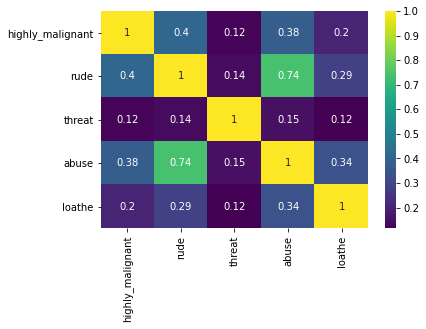

In [8]:
print(train_df.corr())
print(sns.heatmap(train_df.corr(), cmap = 'viridis', annot = True))

### Find Skewness

In [9]:
train_df.skew()

highly_malignant     9.851500
rude                 3.992713
threat              18.188599
abuse                4.160433
loathe              10.515584
dtype: float64

malignant
0.0                                                                                                                                                                                                                                                                                                                                                                                        84980
0                                                                                                                                                                                                                                                                                                                                                                                          59290
1.0                                                                                                                                                                                                                         

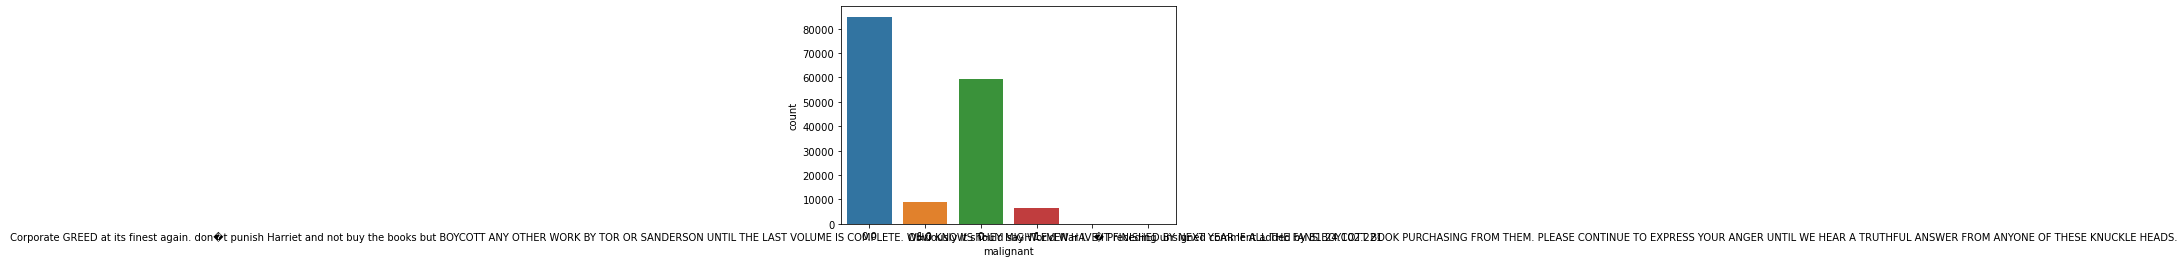

highly_malignant
0.0    157969
1.0      1595
Name: highly_malignant, dtype: int64


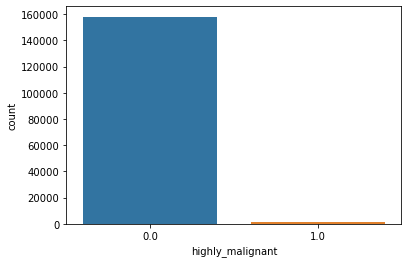

loathe
0.0    158156
1.0      1405
Name: loathe, dtype: int64


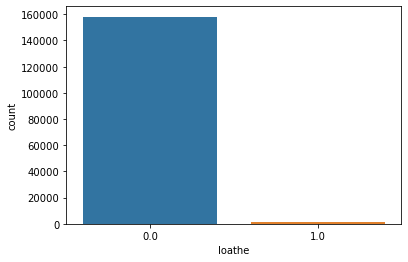

rude
0.0    151115
1.0      8449
Name: rude, dtype: int64


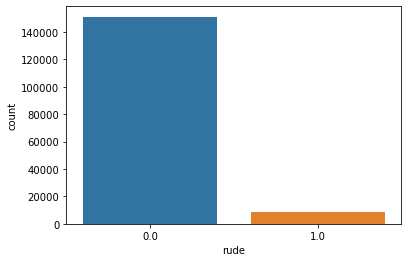

abuse
0.0    151687
1.0      7877
Name: abuse, dtype: int64


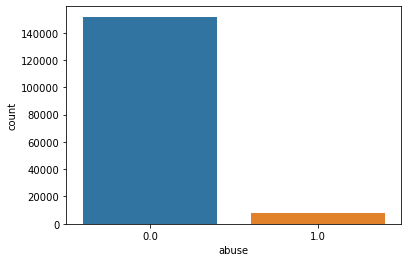

threat
0.0    159086
1.0       478
Name: threat, dtype: int64


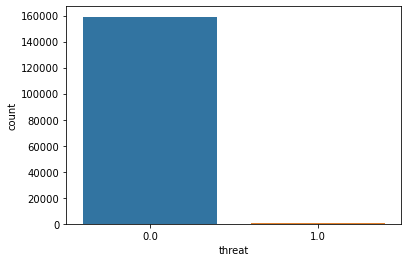

In [10]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in col:
    print(i)
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

### Replacing different words and punctuations of comments

In [11]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb'  (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers  (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Replace punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Replace leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [12]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')

### Showing malignant words by using word cloud

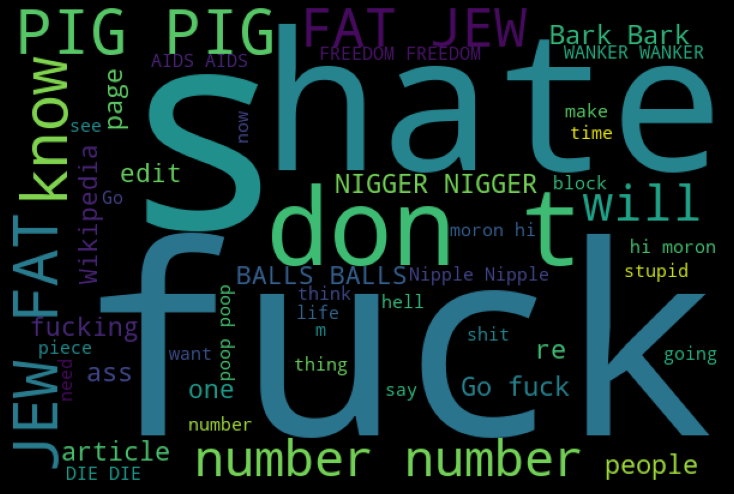

In [13]:
hams = train_df['comment_text'][train_df['malignant'] == 1]
spam_cloud = WordCloud(width = 600, height = 400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Here, we can see all offencive words.

### Word Visualization Through Pie-Chart
##### These words are represent with different colours.

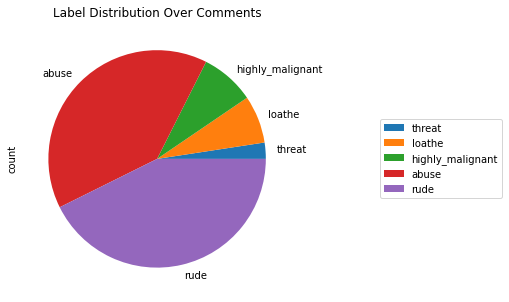

In [14]:
df_distribution = train_df[col].sum()\
                          .to_frame()\
                          .rename(columns = {0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count',
                         title = 'Label Distribution Over Comments',
                         figsize = (5,5))\
                         .legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5));

### Lemmatization

##### Lemmatization is a text normalization technique used in Natural Language Processing (NLP),  a technique that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i] = test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos = "v"))
        test_df['comment_text'][i] = "".join(j)

In [ ]:
for i in range(len(train_df['comment_text'])):
    trin_df['comment_text'][i] = train_df['comment_text'][i].lower()
    j = []
    for word in train_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatizer(word, pos = 'v'))
        train_df['comment_text'][i] = "".join(j)

In [ ]:
x = train_df.drop(['malignant'], axis = 1)
y = train_df['malignant']

In [ ]:
naive = MultinomialNB()

In [ ]:
tf_vec = TfidfVectorizer()

In [ ]:
comment = train_df['comment_text']

In [ ]:
x = tf_vec.fit_transform(comment)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)
naive.fit(x_train, y_train)

In [ ]:
y_pred = naive.predict(x_test)

In [ ]:
joblib.dump(y_pred, "model")

In [ ]:
y_pred